In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from random import shuffle

In [2]:
train_data = np.load('fcw_data/training_data_fcw.npy', allow_pickle=True)

df = pd.DataFrame(train_data)
print(Counter(df[1].apply(str)))
df.head()

Counter({'[0, 1]': 13850, '[1, 0]': 1208})


,0,1
0,"[[[223, 221, 218], [223, 221, 217], [223, 220,...","[0, 1]"
1,"[[[222, 219, 215], [222, 219, 214], [222, 218,...","[0, 1]"
2,"[[[221, 218, 213], [221, 217, 213], [221, 217,...","[0, 1]"
3,"[[[221, 217, 213], [221, 217, 212], [221, 217,...","[0, 1]"
4,"[[[223, 219, 214], [223, 219, 214], [223, 219,...","[0, 1]"


In [3]:
collision, no_collision =[], []
shuffle(train_data)

In [4]:
for data in train_data:
    img = data[0]
    choice = data[1]
    # print(choice)
    if choice == [1, 0]:
        collision.append([img, choice])
        # print("collision")
    else:
        no_collision.append([img, choice])
        # print("no collision")

<BarContainer object of 2 artists>

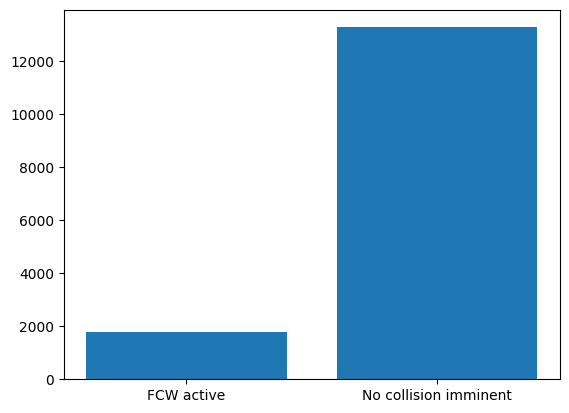

In [5]:
import matplotlib.pyplot as plt
plt.bar(['FCW active', 'No collision imminent'], [len(collision), len(no_collision)])

In [6]:
collision = collision[:len(no_collision)]
no_collision = no_collision[:len(collision)]

<BarContainer object of 2 artists>

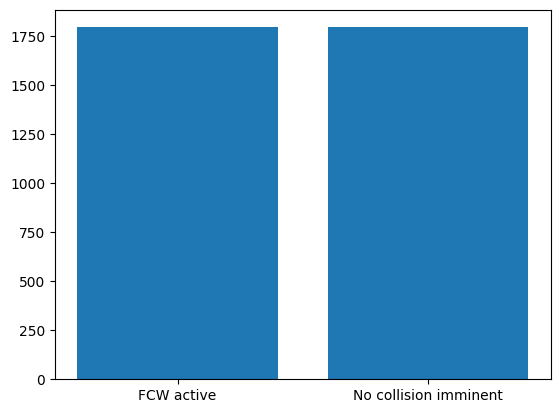

In [7]:
#make a bar plot
import matplotlib.pyplot as plt
plt.bar(['FCW active', 'No collision imminent'], [len(collision), len(no_collision)])

In [9]:
final_data = collision + no_collision
shuffle(final_data)
print(len(final_data))
print(final_data[1][1])

3456
[0, 1]


In [10]:
new_df = pd.DataFrame(final_data)
new_df.head()

,0,1
0,"[[[223, 213, 203], [223, 213, 202], [223, 213,...","[1, 0]"
1,"[[[39, 48, 47], [36, 40, 35], [38, 35, 28], [4...","[0, 1]"
2,"[[[221, 211, 202], [221, 211, 202], [221, 211,...","[1, 0]"
3,"[[[221, 217, 213], [221, 217, 212], [221, 217,...","[0, 1]"
4,"[[[214, 206, 198], [214, 206, 198], [214, 206,...","[0, 1]"


In [12]:
new_df.to_csv("fcw_data/newdf.csv")

In [13]:
print(Counter(new_df[1].apply(str)))

Counter({'[1, 0]': 1728, '[0, 1]': 1728})


In [14]:
dfnp = new_df.to_numpy()
np.save('fcw_data/balanced_new.npy', dfnp)